## ANN Regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_530674/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


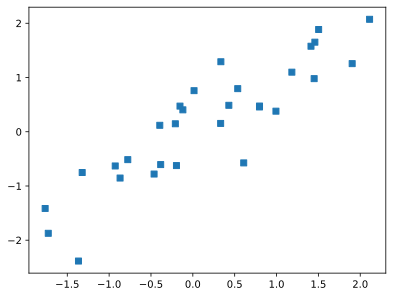

In [3]:
# create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

plt.plot(x, y, 's')
plt.show()

In [4]:
ANNreg = nn.Sequential(
nn.Linear(1, 1), # input layer
    nn.ReLU(),
    nn.Linear(1, 1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
learning_rate = 0.05

lossfunc = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

In [6]:
## Train the Model!!!

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    y_pred = ANNreg(x)

    # compute loss
    loss = lossfunc(y_pred, y)
    losses[epochi] = loss
    if epochi % 20 == 0:
        print(f'{epochi=} : {loss=}')

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochi=0 : loss=tensor(1.5610, grad_fn=<MseLossBackward0>)
epochi=20 : loss=tensor(1.1658, grad_fn=<MseLossBackward0>)
epochi=40 : loss=tensor(1.1601, grad_fn=<MseLossBackward0>)
epochi=60 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=80 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=100 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=120 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=140 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=160 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=180 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=200 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=220 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=240 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=260 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=280 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=300 : loss=tensor(1.1600, grad_fn=<MseLossBackward0>)
epochi=320 : loss=tensor(1.160

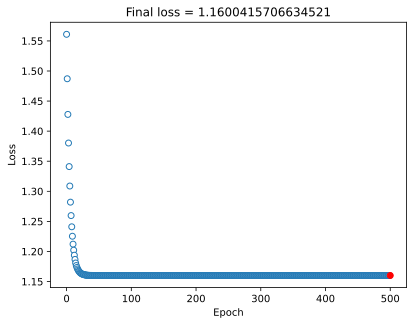

In [7]:
predictions = ANNreg(x)

testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {testloss.item()}')
plt.show()